In [79]:
# Импорт Pandas для работы с DataFrame
import pandas as pd

In [80]:
# Чтение CSV-файла в DataFrame
initial_df = pd.read_csv("Lab3.csv")

# Вывод первых 5 строк для проверки
print(initial_df.head())

               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200  


In [81]:
# Вывод количества пропусков по всем столбцам
print("Пропущенные значения по всем столбцам:")
print(initial_df.isnull().sum())

Пропущенные значения по всем столбцам:
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [82]:
# Найти полностью одинаковые строки
print("Полные дубликаты строк:", initial_df.duplicated().any())

Полные дубликаты строк: False


In [83]:
# замена индекса на столбец country и удаление ненужного столбца
initial_df = initial_df.set_index('country')
print('Колонки:', initial_df.columns)  # 'country' уже нет среди колонок
print('Индекс:', initial_df.index)    # индекс — названия стран

Колонки: Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
Индекс: Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia'],
      dtype='object', name='country', length=167)


[Text(0.5, 0, 'child_mort'),
 Text(1.5, 0, 'exports'),
 Text(2.5, 0, 'health'),
 Text(3.5, 0, 'imports'),
 Text(4.5, 0, 'income'),
 Text(5.5, 0, 'inflation'),
 Text(6.5, 0, 'life_expec'),
 Text(7.5, 0, 'total_fer'),
 Text(8.5, 0, 'gdpp')]

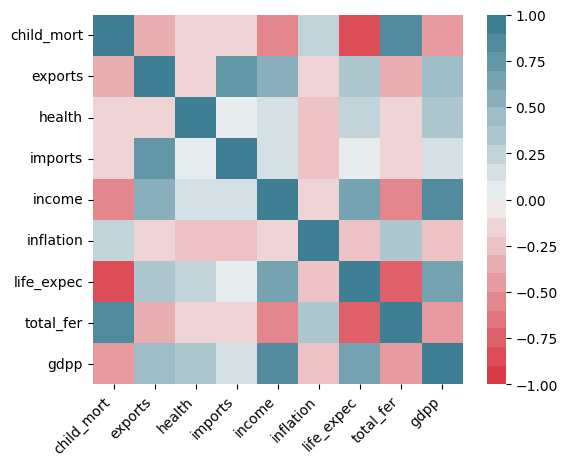

In [52]:
import seaborn as sns

# Ищем корреляцию между переменными
corr = initial_df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=20),
    square=True)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

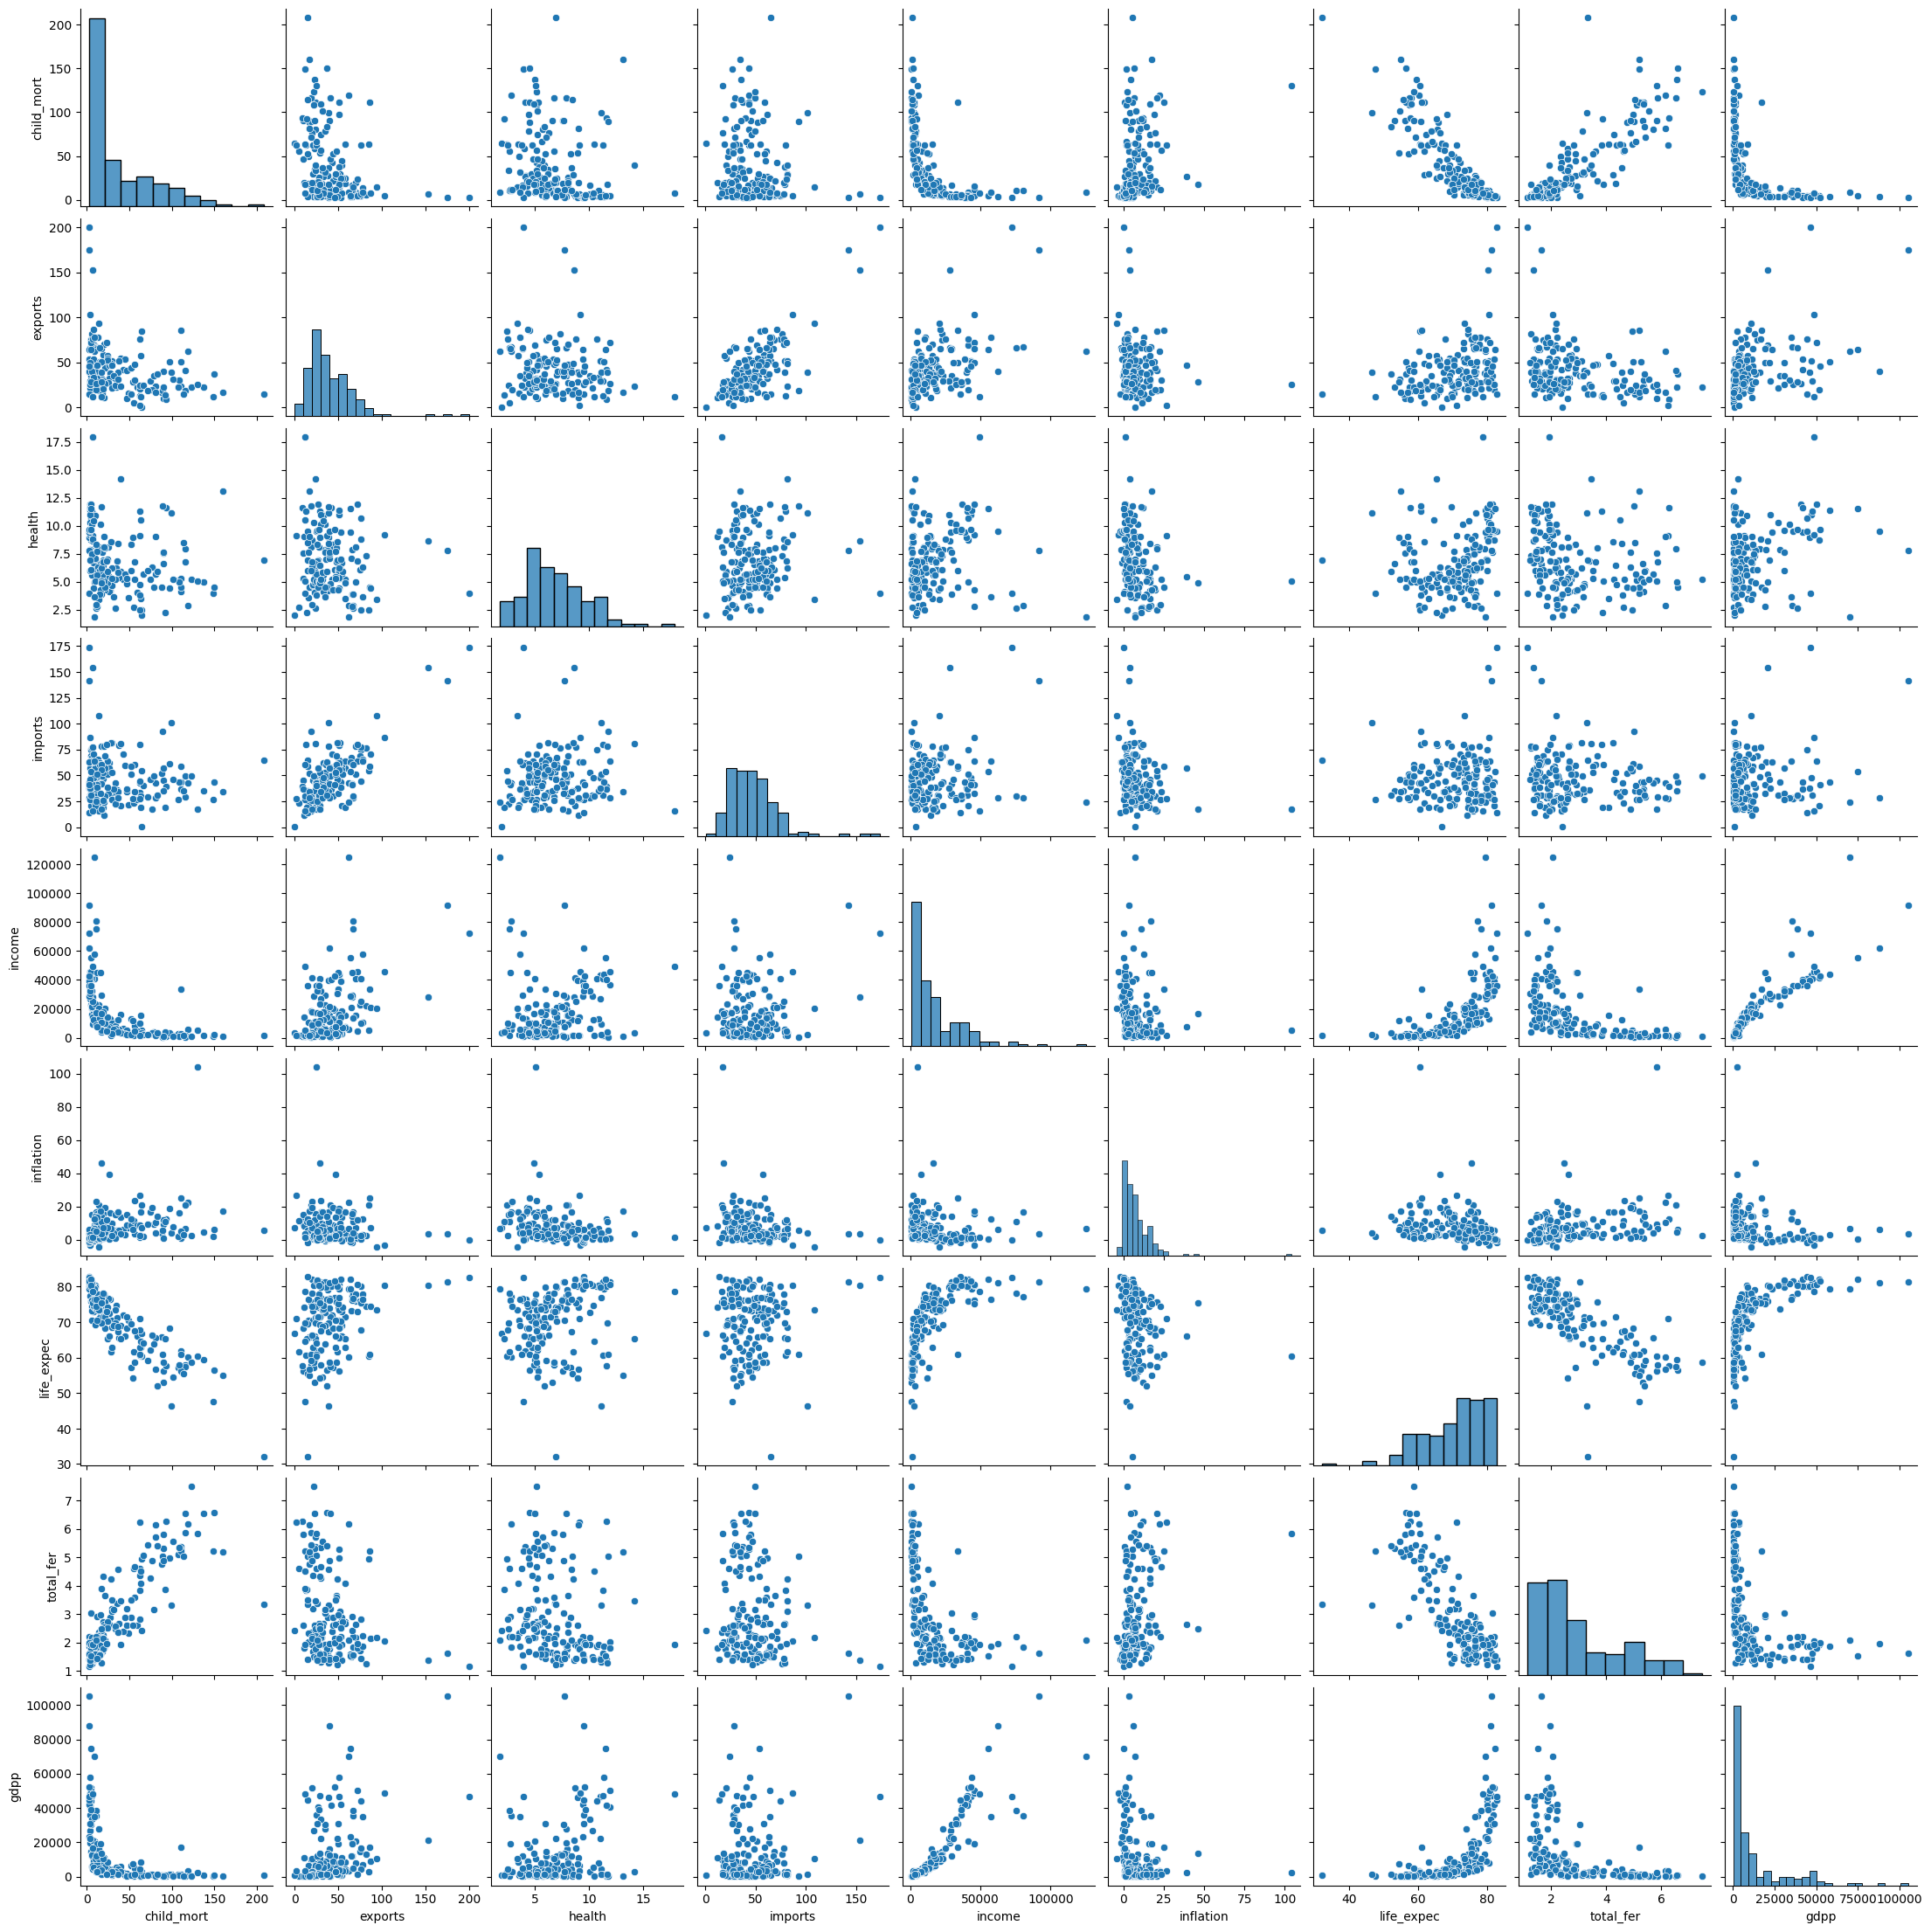

In [53]:
# plot the pair scatter plots of all factors
sns.pairplot(initial_df)

child_mort (детская смертность):
Сильная обратная корреляция с income, life_expec, gdpp

Это значит, что:
Чем выше доход на душу населения (income), ВВП на душу (gdpp) и ожидаемая продолжительность жизни (life_expec) — тем ниже детская смертность.

Умеренная корреляция с inflation (инфляция) и total_fer (рождаемость):

Высокая детская смертность также связана с: высокой инфляцией (экономическая нестабильность → меньше ресурсов на здравоохранение), высокой рождаемостью (total_fer) (часто признак бедности и отсутствия доступа к образованию/медицине)

income (доход на человека) коррелирует с exports и gdpp - страны с высоким экспортом и высоким ВВП на душу как правило богаче.

Экспорт коррелирует с импортом:
Экономически активные страны и много экспортируют, и много импортируют (торговля = часть глобальной экономики).
Эти признаки мало связаны с нуждаемостью в гумпомощи. Страна может мало торговать, но быть стабильной (например, Бутан), или много торговать, но быть неравной (например, Нигерия).
→ Можно исключить exports/imports из кластеризации — они шумят.


life_expec (продолжительность жизни) - коррелирует с income и gdpp(ВВП на душу), обратно — с total_fer (рождаемость). В богатых странах люди живут дольше.
Высокая рождаемость (total_fer) → короткая жизнь (часто из-за перенаселения, нехватки ресурсов, материнской смертности); life_expec — сильный индикатор качества жизни. Низкое значение = тревожный сигнал.



Гуманитарная помощь нужна там, где люди страдают от бедности, голода, болезней,
отсутствия базовой инфраструктуры — независимо от того, как страна участвует в международной торговле или какой у неё уровень инфляции.

exports (экспорт) — не показатель благосостояния населения
Что это: доля экспорта товаров/услуг в % от ВВП на душу.
Почему не релевантен:
Страна может много экспортировать, но богатство концентрироваться у элиты (например, нефтяные страны: Нигерия, Ангола).
Или экспорт идёт в ущерб внутреннему рынку (зерно вывозится, а население голодает).
Есть страны с низким экспортом, но высоким качеством жизни (например, Бутан, Коста-Рика).

imports (импорт) — тоже не показатель нуждаемости
Что это: доля импорта в % от ВВП на душу.
Почему не релевантен:
Богатые страны много импортируют (машины, электронику, лекарства).
Бедные страны мало импортируют, потому что нет денег.
Но иногда бедные страны импортируют много (например, продовольствие из-за неурожая) — это следствие кризиса, а не причина нуждаемости.
Вывод: импорт — это торговый показатель, а не социальный. Он не говорит, страдает ли население.

inflation (инфляция) — шумный и нестабильный индикатор
Что это: рост цен в экономике.
Почему не релевантен:
Высокая инфляция может быть временной (например, после пандемии или войны).
Некоторые страны с умеренной инфляцией (10–20%) при этом очень бедны (Малави, Бурунди).
Другие — с низкой инфляцией — могут быть стабильными и богатыми (Германия).
Но есть исключения: Аргентина — высокая инфляция, но уровень жизни выше, чем в ЦАР или Чаде.

Рекомендуемые признаки для кластеризации:
child_mort - прямой индикатор кризиса в здравоохранении и бедности
life_expec - общее качество жизни, доступ к медицине, питанию
gdpp - ключевой показатель бедности — страны с ВВП < $1000 — в критическом положении
total_fer - высокая рождаемость → давление на ресурсы, часто коррелирует с бедностью
health - низкие расходы на здравоохранение → слабая система здравоохранения

In [100]:
from sklearn.preprocessing import RobustScaler

# Выбираем только нужные столбцы ДО масштабирования
data_columns = ['child_mort', 'life_expec', 'total_fer', 'gdpp', 'health']
df_to_scale = initial_df[data_columns]

#Нормализуем данные
scaler = RobustScaler()
df_scaled_array = scaler.fit_transform(df_to_scale)

# Преобразуем обратно в DataFrame с теми же именами столбцов
df_scaled = pd.DataFrame(df_scaled_array, columns=data_columns, index=initial_df.index)

Нормализация данных: StandardScaler - если распределения признаков без сильных выбросов

RobustScaler - устойчив к выбросам (использует медиану и IQR)

K-means кластеризация

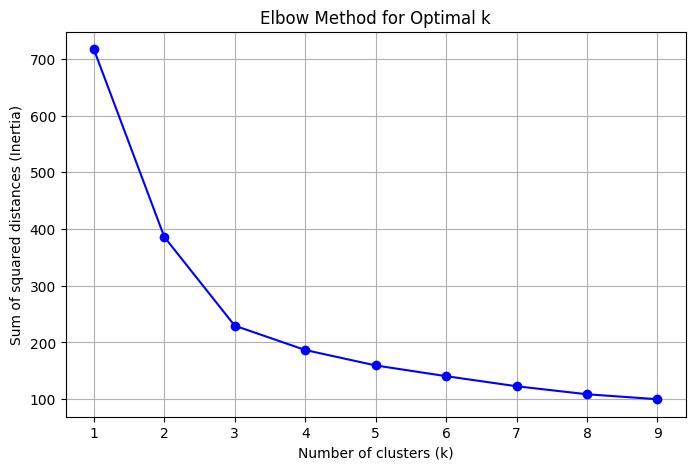

In [101]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

K = range(1, 10)
ssd = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, ssd, 'bo-')
plt.grid(True)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

Ищем точку, где наклон графика резко меняется — это и есть «локоть».
В вашем случае — это k = 3 или k = 4.

При k=2 → k=3: большой скачок в уменьшении ошибки → добавление третьего кластера даёт значимое улучшение.
При k=3 → k=4: улучшение меньше — кластеры становятся мельче, но не обязательно информативнее.
При k>4: почти нет прироста — значит, дополнительные кластеры не несут новой информации.

k=2: Silhouette Score = 0.4964
k=3: Silhouette Score = 0.4495
k=4: Silhouette Score = 0.4477
k=5: Silhouette Score = 0.3407
k=6: Silhouette Score = 0.2925
k=7: Silhouette Score = 0.3059
k=8: Silhouette Score = 0.3048
k=9: Silhouette Score = 0.2859


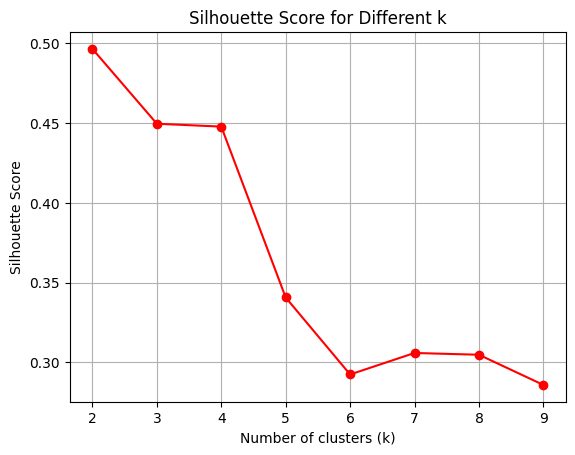

In [102]:
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 10):  # sil score не определён для k=1
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    sil_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.4f}")

plt.plot(range(2, 10), sil_scores, 'ro-')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

По силуэтному коэффициенту можно сказать, что 2 имеет лучшую сходимость элементов кластера, у 3 и 4 она немного падает, а дальше идет резкое падение, лучшим вариантом является 3 кластера, судя по двум методам

In [117]:
from sklearn.cluster import KMeans

#Обучаем модель для кластеризации на основе k-средних
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
initial_df['cluster_kmeans'] = kmeans.fit_predict(df_scaled)

In [118]:
print(initial_df)

                     child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   
...                         ...      ...     ...      ...     ...        ...   
Vanuatu                    29.2     46.6    5.25     52.7    2950       2.62   
Venezuela                  17.1     28.5    4.91     17.6   16500      45.90   
Vietnam                    23.3     72.0    6.84     80.2    4490      12.10   
Yemen                      56.3     30.0    5.18     34.4    4480      23.60   
Zambia                     83.1     37.0

In [120]:
# Найдем страну, ближайшую к центроиду кластера

import numpy as np

# Словарь для хранения эталонных стран
prototype_countries = {}

# Проходим по каждому кластеру
for cluster_id in range(kmeans.n_clusters):
    # 1. Выбираем страны, принадлежащие этому кластеру
    mask = initial_df['cluster_kmeans'] == cluster_id
    cluster_scaled = df_scaled[mask]  # остаётся DataFrame с индексом = названия стран

    if cluster_scaled.empty:
        continue

    # 2. Получаем центр кластера (из модели)
    center = kmeans.cluster_centers_[cluster_id]

    # 3. Считаем квадрат евклидова расстояния от каждой страны до центра
    #    (квадрат — чтобы не тратить время на sqrt, порядок тот же)
    distances_sq = ((cluster_scaled - center) ** 2).sum(axis=1)

    # 4. Находим страну с минимальным расстоянием
    prototype_country = distances_sq.idxmin()  # ← idxmin() возвращает ИНДЕКС (название страны)!

    prototype_countries[cluster_id] = prototype_country

# Вывод результата
for cluster_id, country in prototype_countries.items():
    print(f"Кластер {cluster_id}: эталонная страна — {country}")

Кластер 0: эталонная страна — Grenada
Кластер 1: эталонная страна — Togo
Кластер 2: эталонная страна — Finland


In [121]:
# Посмотрим значения признаков для эталонных стран
for cluster_id, country in prototype_countries.items():
    row = initial_df.loc[country, data_columns]
    print(f"\nКластер {cluster_id} — {country}:")
    for col in data_columns:
        print(f"  {col}: {row[col]:.2f}")


Кластер 0 — Grenada:
  child_mort: 14.60
  life_expec: 71.30
  total_fer: 2.24
  gdpp: 7370.00
  health: 5.86

Кластер 1 — Togo:
  child_mort: 90.30
  life_expec: 58.70
  total_fer: 4.87
  gdpp: 488.00
  health: 7.65

Кластер 2 — Finland:
  child_mort: 3.00
  life_expec: 80.00
  total_fer: 1.87
  gdpp: 46200.00
  health: 8.95


Кластер 1 (Togo) — это беднейшие страны с кризисом в здравоохранении, образовании и экономике → высочайший приоритет для гуманитарной помощи (медицинская поддержка, вакцинация, продовольствие, программы по снижению детской смертности).

Кластер 0 (Grenada) — страны со средним уровнем развития: есть проблемы, но нет острого кризиса → Помощь может быть полезна, но не срочна.

Кластер 2 (Finland) — развитые страны с высоким качеством жизни → не нуждаются в гуманитарной помощи.

Иерархическая кластеризация

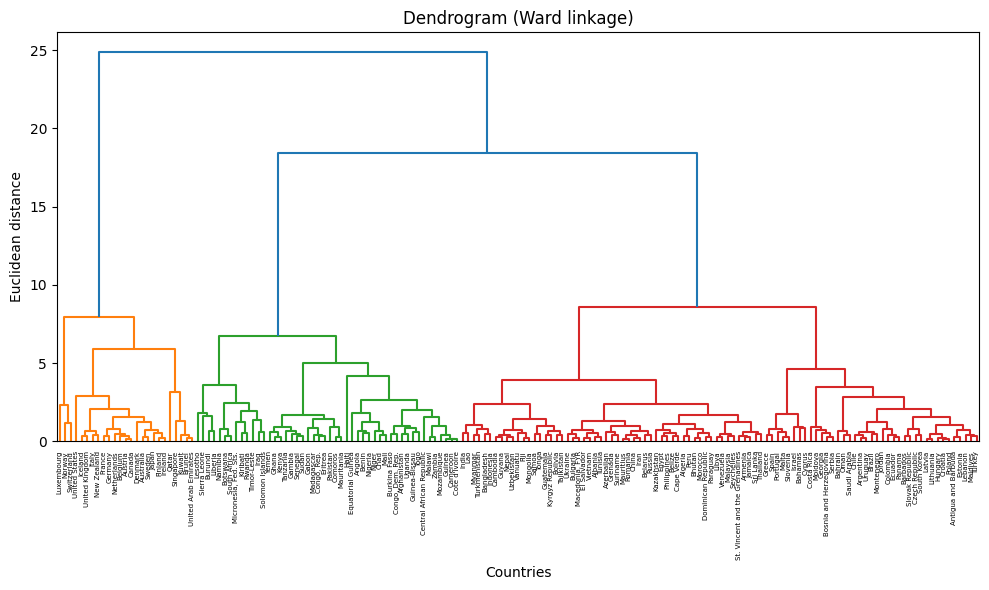

In [122]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# --- Часть 1: Дендрограмма для выбора k (опционально, визуально) ---
plt.figure(figsize=(10, 6))
linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix, labels=df_scaled.index, leaf_rotation=90)
plt.title('Dendrogram (Ward linkage)')
plt.xlabel('Countries')
plt.ylabel('Euclidean distance')
plt.tight_layout()
plt.show()

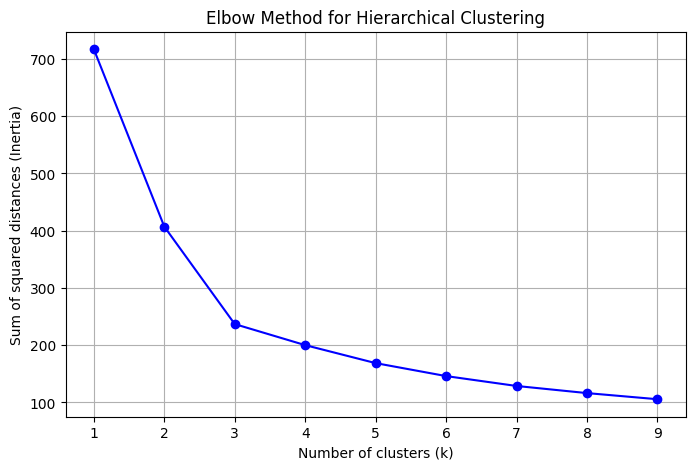

In [123]:
from sklearn.cluster import AgglomerativeClustering

K = range(1, 10)
ssd_hier = []

for k in K:
    hier = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hier.fit_predict(df_scaled)

    # Вычисляем центроиды и инерцию вручную
    inertia = 0
    for cluster_id in set(labels):
        mask = labels == cluster_id
        cluster_points = df_scaled[mask]
        center = cluster_points.mean(axis=0)
        inertia += ((cluster_points - center) ** 2).sum().sum()
    ssd_hier.append(inertia)

plt.figure(figsize=(8, 5))
plt.plot(K, ssd_hier, 'bo-', label='Inertia')
plt.grid(True)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (Inertia)')
plt.title('Elbow Method for Hierarchical Clustering')
plt.show()

Сюдя по графикам аналогично 3 кластера наилучший выбор



In [124]:
n_clusters_hier = 3
hier = AgglomerativeClustering(n_clusters=n_clusters_hier, linkage='ward')
initial_df['cluster_hier'] = hier.fit_predict(df_scaled)

# --- Часть 3: Найти эталонную страну для каждого кластера ---
# Для этого нам нужны центроиды → вычислим вручную
prototype_countries_hier = {}

# Группируем по кластерам и считаем центр
for cluster_id in range(n_clusters_hier):
    mask = initial_df['cluster_hier'] == cluster_id
    cluster_data = df_scaled[mask]

    if cluster_data.empty:
        continue

    # Центр кластера = среднее по признакам
    center = cluster_data.mean(axis=0).values  # numpy array

    # Расстояния до центра
    distances_sq = ((cluster_data - center) ** 2).sum(axis=1)
    prototype_country = distances_sq.idxmin()
    prototype_countries_hier[cluster_id] = prototype_country

# Вывод
print("\n=== Иерархическая кластеризация ===")
for cluster_id, country in prototype_countries_hier.items():
    print(f"Кластер {cluster_id}: эталонная страна — {country}")

for cluster_id, country in prototype_countries_hier.items():
    row = initial_df.loc[country, data_columns]
    print(f"\nКластер {cluster_id} — {country}:")
    for col in data_columns:
        print(f"  {col}: {row[col]:.2f}")


=== Иерархическая кластеризация ===
Кластер 0: эталонная страна — Grenada
Кластер 1: эталонная страна — Ireland
Кластер 2: эталонная страна — Togo

Кластер 0 — Grenada:
  child_mort: 14.60
  life_expec: 71.30
  total_fer: 2.24
  gdpp: 7370.00
  health: 5.86

Кластер 1 — Ireland:
  child_mort: 4.20
  life_expec: 80.40
  total_fer: 2.05
  gdpp: 48700.00
  health: 9.19

Кластер 2 — Togo:
  child_mort: 90.30
  life_expec: 58.70
  total_fer: 4.87
  gdpp: 488.00
  health: 7.65


Помощь в первую очередь нужна странам из Кластера 2, эталонная страна которого — Того (Togo).

DBSCAN

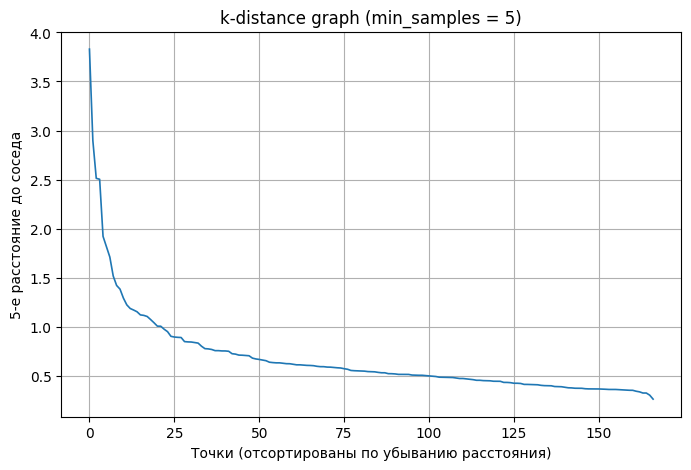

In [126]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


min_samples = 5  # или 6 — попробуйте оба

# Найдём расстояния до min_samples-го соседа (не до min_samples-1!)
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(df_scaled)
distances, _ = nbrs.kneighbors(df_scaled)
k_distances = distances[:, -1]  # расстояние до самого дальнего из min_samples соседей

# Сортируем по убыванию
k_distances_sorted = np.sort(k_distances)[::-1]

# Строим график
plt.figure(figsize=(8, 5))
plt.plot(k_distances_sorted, linewidth=1.2)
plt.xlabel('Точки (отсортированы по убыванию расстояния)')
plt.ylabel(f'{min_samples}-е расстояние до соседа')
plt.title(f'k-distance graph (min_samples = {min_samples})')
plt.grid(True)
plt.show()

Локоть находится примерно в районе y = 0.8–1.0 — именно здесь кривая становится почти горизонтальной.

In [159]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# --- Часть 1: Подбор параметров (eps, min_samples) — здесь используем эвристику или перебор ---
# Пример: используем eps=0.5, min_samples=5 (подстройте под ваши данные)
eps = 0.6
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
initial_df['cluster_dbscan'] = dbscan.fit_predict(df_scaled)

# --- Часть 2: Анализ результатов ---
labels = initial_df['cluster_dbscan']
n_clusters_dbscan = len(set(labels)) - (1 if -1 in labels else 0)

print("\n=== DBSCAN ===")
print(f"Найдено кластеров: {n_clusters_dbscan}")


=== DBSCAN ===
Найдено кластеров: 5


In [160]:
print("Все метки кластеров (включая шум):", sorted(set(labels)))
print("Уникальные кластеры (без шума):", sorted([lbl for lbl in set(labels) if lbl != -1]))
print("Количество кластеров (без шума):", len([lbl for lbl in set(labels) if lbl != -1]))

Все метки кластеров (включая шум): [-1, 0, 1, 2, 3]
Уникальные кластеры (без шума): [0, 1, 2, 3]
Количество кластеров (без шума): 4


In [161]:
# --- Часть 3: Для DBSCAN нет центроидов, но можно найти "репрезентативную" точку ---
# Например, медиану или точку с наименьшим средним расстоянием до других в кластере
prototype_countries_dbscan = {}

unique_labels = set(labels)
if -1 in unique_labels:
    unique_labels.remove(-1)  # пропускаем шум

for cluster_id in unique_labels:
    mask = labels == cluster_id
    cluster_data = df_scaled[mask]

    if cluster_data.empty or len(cluster_data) < 2:
        # Если 1 точка — она и есть репрезентативная
        country = cluster_data.index[0]
        prototype_countries_dbscan[cluster_id] = country
        continue

    # Считаем попарные расстояния внутри кластера (медленно при больших кластерах!)
    from sklearn.metrics.pairwise import euclidean_distances
    dists = euclidean_distances(cluster_data)
    avg_dists = dists.mean(axis=1)  # среднее расстояние от каждой точки до остальных
    rep_idx = np.argmin(avg_dists)
    country = cluster_data.index[rep_idx]
    prototype_countries_dbscan[cluster_id] = country

# Вывод
for cluster_id, country in prototype_countries_dbscan.items():
    print(f"Кластер {cluster_id}: репрезентативная страна — {country}")

for cluster_id, country in prototype_countries_dbscan.items():
    row = initial_df.loc[country, data_columns]
    print(f"\nКластер {cluster_id} — {country}:")
    for col in data_columns:
        print(f"  {col}: {row[col]:.2f}")


Кластер 0: репрезентативная страна — Cote d'Ivoire
Кластер 1: репрезентативная страна — Grenada
Кластер 2: репрезентативная страна — Belgium
Кластер 3: репрезентативная страна — Senegal

Кластер 0 — Cote d'Ivoire:
  child_mort: 111.00
  life_expec: 56.30
  total_fer: 5.27
  gdpp: 1220.00
  health: 5.30

Кластер 1 — Grenada:
  child_mort: 14.60
  life_expec: 71.30
  total_fer: 2.24
  gdpp: 7370.00
  health: 5.86

Кластер 2 — Belgium:
  child_mort: 4.50
  life_expec: 80.00
  total_fer: 1.86
  gdpp: 44400.00
  health: 10.70

Кластер 3 — Senegal:
  child_mort: 66.80
  life_expec: 64.00
  total_fer: 5.06
  gdpp: 1000.00
  health: 5.66


Наибольшая помощь требуется Кластеру 0 (Кот-д’Ивуар и аналогичные страны).
Второй приоритет — Кластер 3 (Сенегал и подобные).